# Solution to PRML Assignment 1 


# Question 1:PCA algorithm

Import Libraries

In [4]:
import pandas as pd #To read input csv file
import numpy as np   
import matplotlib.pyplot as plt

Read input

In [5]:
#Reading input from .csv file
inputData=pd.read_csv('Dataset.csv',header=None) #Relative Pathname--Input must be at same folder as code;
                                                 #header-Otherwise first row is considered as header

#Plotting input data for the sake of report
#Reference:https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

npInputData=np.array(inputData).astype(float) 
plt.scatter(npInputData[:, 0],npInputData[:, 1],s=7)
plt.title("Input Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

print("Input Data\n",inputData[:5])

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset.csv'

# 1.i)PCA Algorithm on Given Dataset

In [ ]:
#Calculate Mean Ref:https://numpy.org/doc/stable/reference/generated/numpy.average.html
meanArray=np.average(npInputData, axis=0)
#print(meanArray)

#Centering the input data
npCenteredInput=np.array(inputData).astype(float) #Initialize to input,later subtract mean
npCenteredInput =npCenteredInput-meanArray

print("Centralized input", npCenteredInput[:5])

In [ ]:
#find covarience matrix Reference:https://numpy.org/doc/stable/reference/generated/numpy.cov.html
npCenteredInput=np.transpose(npCenteredInput) #Because input format required for np.cov is each row rep. a variable
covMatrix = np.cov(npCenteredInput)
#print(covMatrix)

#Compute eigen values and eigen vectors for covarience matrix
eigValues , eigVectors = np.linalg.eig(covMatrix)
#print(eigVectors)
#print(eigValues)
#print(eigValues.shape)
#print(eigVectors.shape)


#Choosing components and forming a Feature vector. principal components==Eigen Vectors
#Feature vector is a matrix that has eigenvectors of the components that we decide to keep;
#can discard less significant Principal components.Here first sort wrt eigValues,then choose k highest
feaVec=eigVectors[:,:2] #2 is no of Principle Components. (only x1 and x2 here)
#print(feaVec)
#print(feaVec.shape)

#Transforming original dataset: (centered input)*(feature vector); classs-(xTrans*omega)omega
transformedData=np.dot(np.transpose(npCenteredInput), feaVec)
#transformedData = np.transpose(np.dot(np.transpose(feaVec), npCenteredInput))

print("PCA Transformed Dataset\n",transformedData[:5])

#Plotting transformed data
plt.scatter(transformedData[:, 0],transformedData[:, 1],s=7)
plt.title("PCA transformed Dataset")
arg = np.array([[0, 0],[0, 0]])
plt.quiver(*arg, 10*eigValues[0] * feaVec[:,0], 10*eigValues[1] * feaVec[:,1]) #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html
plt.xlabel("PCA X1")
plt.xlabel("PCA X2")
plt.show()

#plt.scatter(transformedData[:, 0],transformedData[:, 1],s=7)
#plt.title("PCA transformed Dataset with Principle component")
#arg = np.array([[0, 0],[0, 0]])
#plt.quiver(*arg,eigValues[0] * feaVec[:,0],eigValues[1] * feaVec[:,1]) #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html
#plt.xlabel("PCA X1")
#plt.xlabel("PCA X2")
#plt.show()


In [6]:
#Q1.i:How much of the variance in the data-set is explained by each of the principal components
#Ans:Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the 
#principal components (eigenvectors) generated by the principal component analysis (PCA) method.
#Refers to the amount of variability in a data set that can be attributed to each individual principal component.

#Explained variance can be represented as a function of ratio of related eigenvalue and sum of eigenvalues of all eigenvectors. 
#Let’s say that there are N eigenvectors, then the explained variance for each eigenvector (principal component) can be 
#expressed the ratio of eigenvalue of related eigenvalue λi and sum of all eigenvalues (λ1+λ2+…+λn)

#Refered:https://vitalflux.com/pca-explained-variance-concept-python-example/

#The total variance is the sum of variances of all individual principal components.
#The fraction of variance explained by a principal component is the ratio between the variance of that principal component 
#and the total variance

var = []
eigSum=0
#for i in eigValues:
#    eigSum=eigSum+eigValues[i];
eigSum=sum(eigValues)
var = [eigValues*100/eigSum]
    
print("Explained variance: \n", var)

NameError: name 'eigValues' is not defined

# Q1.ii )PCA without centering the dataset

PCA Transformed Dataset(Without Centering)
 [[ 0.18333077 -0.97822591]
 [ 0.60714951 -0.83405039]
 [-0.71293948  0.64401612]
 [-0.77704472 -0.65904824]
 [ 0.83024632  0.56600626]]


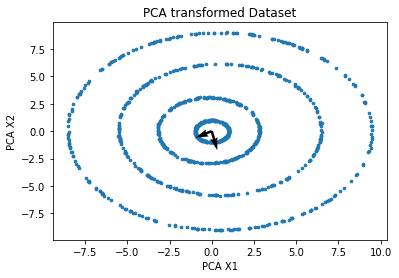

In [253]:
#Repeat above steps skipping centering
npInputData=np.transpose(npInputData)
covMatrix = np.cov(npInputData)
eigValues , eigVectors = np.linalg.eig(covMatrix)
feaVec=eigVectors[:,:2]
transformedData=np.dot(np.transpose(npInputData), feaVec)

print("PCA Transformed Dataset(Without Centering)\n",transformedData[:5])

#Plotting transformed data
plt.scatter(transformedData[:, 0],transformedData[:, 1],s=7)
plt.title("PCA transformed Dataset")
arg = np.array([[0, 0],[0, 0]])
plt.quiver(*arg, 10*eigValues[0] * feaVec[:,0], 10*eigValues[1] * feaVec[:,1])
plt.xlabel("PCA X1")
plt.ylabel("PCA X2")
plt.show()

# Q1.iii) Kernal PCA

C:\Users\ksada\AppData\Local\Temp\ipykernel_9312\938493502.py:39: RuntimeWarning: invalid value encountered in sqrt
  alphak = eigVecs[:, k] / np.sqrt(len(eigVals)*eigVals[k])


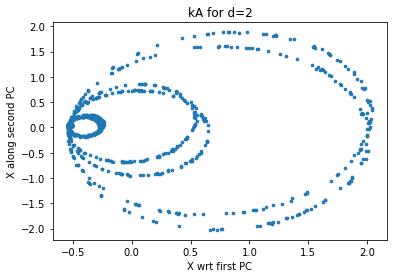

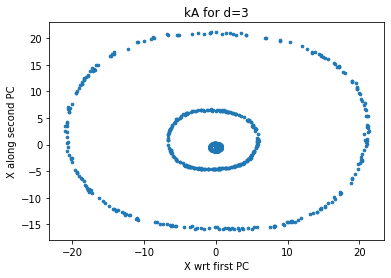

In [261]:
#As per definition given in Q1.iii.A and B, define Kernels

def kA(x,y,d):
    return (1+np.dot(np.transpose(x), y))**d

#https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
def kB(x,y,sigma):
    return np.exp(( -0.5 * np.linalg.norm(x - y))/( sigma ** 2) )

#kA part:

#Compute Kernel

def kernelA(ip,d):
    ip = np.transpose(ip)

    ker = []
    r,c = ip.shape
    for i in range(c):
        tempRow = []
        for j in range(c):
            kij = kA(ip[:, i], ip[:, j], d)
            tempRow.append(kij)
        ker.append(tempRow)
    npKer = np.array(ker)
            
    #Centering
    allOnes = np.ones(npKer.shape)/c
    npKer = npKer - np.matmul(allOnes, npKer) - np.matmul(npKer, allOnes) + np.matmul(allOnes, np.matmul(npKer, allOnes))
    
    #print(npKer)    
    
    #Find eigen values and eigen vectors for Kernel matrix
    eigVals , eigVecs = np.linalg.eig(npKer) #betaK and lambdaK
    eigVals = np.real_if_close(eigVals, tol=1)  #got complex value error, 
    eigVecs = np.real_if_close(eigVecs, tol=1)
    eigToSort = []
    for k in range(len(eigVals)):
        alphak = eigVecs[:, k] / np.sqrt(len(eigVals)*eigVals[k])
        eigToSort.append((eigVals[k], alphak))  #to sort wrt eigen values, first appending
    eigToSort.sort(key= lambda x: x[0], reverse=True)
    
    #Transform dataset
    eigReq = eigToSort[:2] #here 2 is lower dimension
    reqEigVec = np.transpose(np.array([list(eV[1]) for eV in eigReq])) #seperate out eigen vectors
    reqEigVec = np.real_if_close(reqEigVec, tol=1)
    kerTrans = np.transpose(npKer)    
    res = np.dot(kerTrans, reqEigVec) #transformed dataset
    return res.T #Transpose
                
#call kA for d=2 and 3
npInputData=np.array(inputData).astype(float) 
op1= kernelA(npInputData,2)

#plot result
plt.scatter(op1[0, :], op1[1, :], s=7)
plt.title("kA for d=2")
plt.xlabel("X wrt first PC")
plt.ylabel("X along second PC")
plt.show()

op2= kernelA(npInputData,3)

#plot result
plt.scatter(op2[0, :], op2[1, :], s=7)
plt.title("kA for d=3")
plt.xlabel("X wrt first PC")
plt.ylabel("X along second PC")
plt.show()



C:\Users\ksada\AppData\Local\Temp\ipykernel_9312\841068486.py:36: RuntimeWarning: invalid value encountered in sqrt
  alphak = eigVecs[:, k] / np.sqrt(len(eigVals)*eigVals[k])


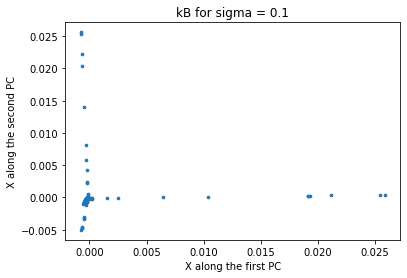

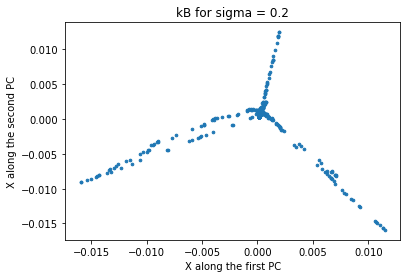

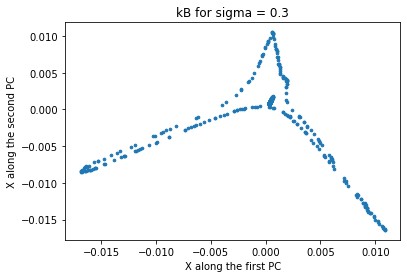

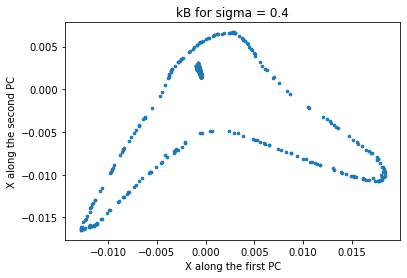

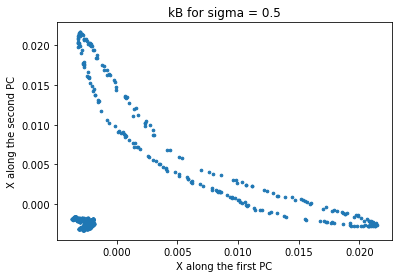

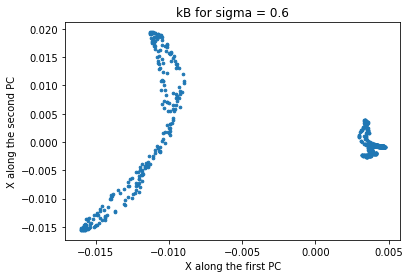

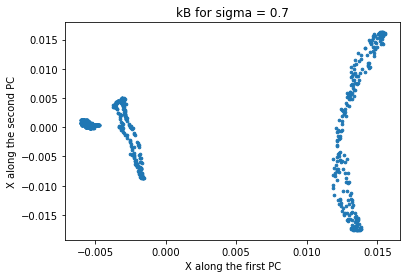

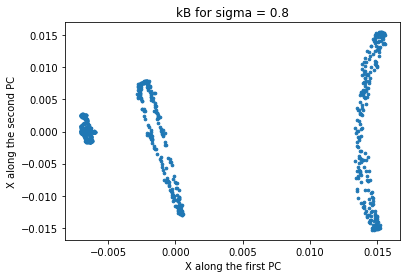

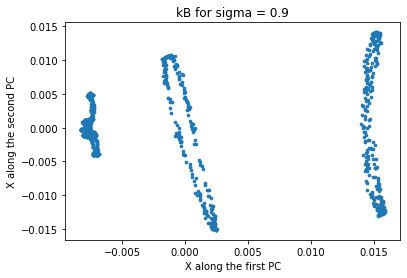

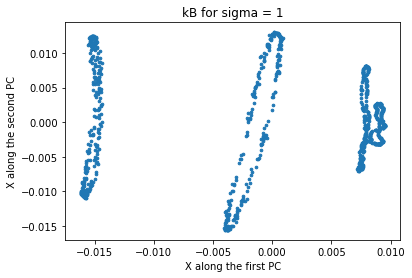

In [269]:
#kB part:

#Compute Kernel

def kernelB(ip,sigma):
    ip = np.transpose(ip)

    ker = []
    r,c = ip.shape
    for i in range(c):
        tempRow = []
        for j in range(c):
            kij = kB(ip[:, i], ip[:, j], sigma)
            tempRow.append(kij)
        ker.append(tempRow)
    npKer = np.array(ker)
            
    #Centering
    #Formula for Kernel Centering
#(Phi(x) - mean(phi(X))^T(phi(x') - mean(phi(X))) in terms of K?
#You must get something that depends on the original kernel K, the row averages (column aversges) of K and the average of all entries of K.
#If your one step derivation is correct, you will end up with a symmetric kernel (obviously)
                                 
    allOnes = np.ones(npKer.shape)/c
    npKer = npKer - np.matmul(allOnes, npKer) - np.matmul(npKer, allOnes) + np.matmul(allOnes, np.matmul(npKer, allOnes))
    
    #print(ker)    
    #return ker
    
    #Find eigen values and eigen vectors for Kernel matrix
    eigVals , eigVecs = np.linalg.eig(npKer) #betaK and lambdaK
    eigVals = np.real_if_close(eigVals, tol=1)  #got complex value error, 
    eigVecs = np.real_if_close(eigVecs, tol=1)
    eigToSort = []
    for k in range(len(eigVals)):
        alphak = eigVecs[:, k] / np.sqrt(len(eigVals)*eigVals[k])
        eigToSort.append((eigVals[k], alphak))  #to sort wrt eigen values, first appending
    eigToSort.sort(key= lambda x: x[0], reverse=True)
    
    #Transform dataset
    eigReq = eigToSort[:2] #here 2 is lower dimension
    reqEigVec = np.transpose(np.array([list(eV[1]) for eV in eigReq])) #seperate out eigen vectors
    reqEigVec = np.real_if_close(reqEigVec, tol=1)
    kerTrans = np.transpose(npKer)    
    res = np.dot(kerTrans, reqEigVec) #transformed dataset
    return res.T
                
#call kA for d=2 and 3
npInputData=np.array(inputData).astype(float) 

sig= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in sig:
    op=kernelB(npInputData,i)
    plt.scatter(op[0, :],op[1, :], s=7)
    plt.title("kB for sigma = {}".format(i))
    plt.xlabel("X along the first PC")
    plt.ylabel("X along the second PC")
    plt.show()

# Q1.iv. Which Kernel do you think is best suited for this dataset and why?

Kernal given as B (which is Radial Basis Function) is best suited here as it seperates out the dataset more precisely. We can observe that the datapoints forming circular structure in input which we can think as a group are seperated out better at Radial basis function

# Q2) CLUSTERING

Q2.You are given a data-set with 1000 data points 

i. Write a piece of code to run the algorithm studied in class for the K-means
problem with k = 4 . Try 5 different random initialization and plot the error
function w.r.t iterations in each case. In each case, plot the clusters obtained in
different colors.


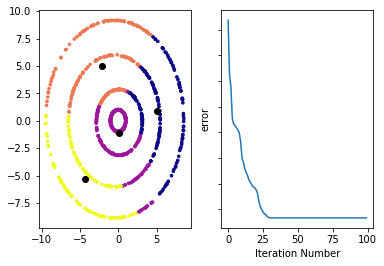

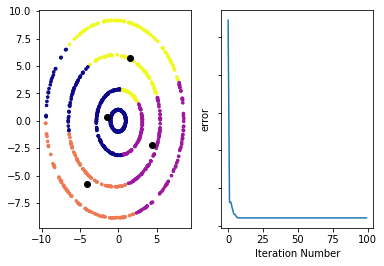

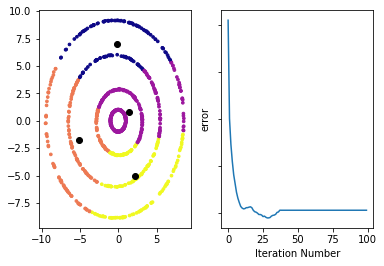

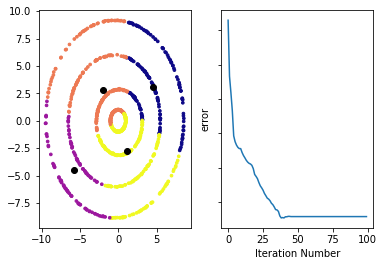

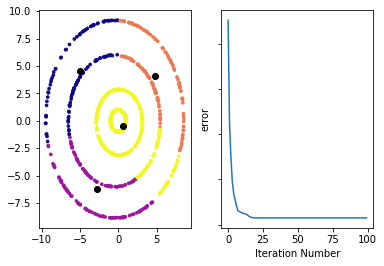

In [235]:
import random #for random mean initialization

#taking K as 4 as per que, generalize later
    
def calcZmat(npInputData , means):
    zMat = []
    for x in npInputData:
        dist = []
        for y in means:
            dis = np.sqrt(np.sum((x - y)**2)) #Req as 2D points
            dist.append(dis) #Calculate dist to each mean in set for a point
        zMat.append(np.argmin(np.array(dist)))
    return zMat
            
def kmeans():
    npInputData=np.array(inputData).astype(float) 
    
    #Initialize Random mean values
    randomIndex = random.sample(range(0, len(npInputData)), 4) #4 bcz K=4 here
    randomMean = [npInputData[i] for i in randomIndex]

    means = randomMean #Centroid points as of now
    errorFn = []
    for i in range (100): #wrt algo,enough to stop when data settles-here 50 for graph sake 
        
        zMat = calcZmat(npInputData,means)
        
        #calc error wrt new Z assignment matrix
        e=0
        for i in range(len(npInputData)):
            e = e + np.sqrt(np.sum((npInputData[i] - means[zMat[i]])**2))
        errorFn.append(e) #Contains error at each step
        
        #Update Centroids
        clusters = [[] for i in range(4)] #4 as K=4,clusters 
        newMeans = []
        for i in range(len(npInputData)):
            clusters[zMat[i]].append(npInputData[i]) #Add data point to respective cluster
        for i in range(len(clusters)):
            newMeans.append(np.average(clusters[i], axis=0))
        
        means = newMeans

        
    #Plot the results
    plt.title("K means algorithm, Random means = {}".format(randomMean))
    plt.subplot(1, 2, 1)
    plt.scatter(npInputData[:, 0], npInputData[:, 1], c=zMat, s=7, cmap='plasma')
    plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], color='black')
    
    plt.subplot(1,2,2)
    plt.plot([i for i in range(100)], errorFn)
    plt.xlabel('Iteration Number')
    plt.ylabel('error')
    ax = plt.gca()
    ax.axes.yaxis.set_ticklabels([])
    plt.show()    
    
#Run algo for 5 diff initializations
for x in range(5):
    kmeans()
    

Q2.ii)Fix a random initialization. For K = {2, 3, 4, 5}, obtain cluster centers according
to K-means algorithm using the fixed initialization. For each value of K, plot the
Voronoi regions associated to each cluster center.

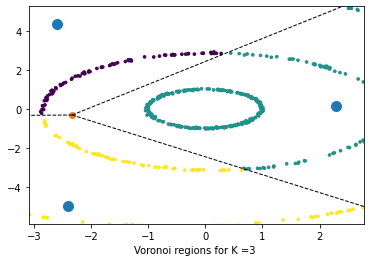

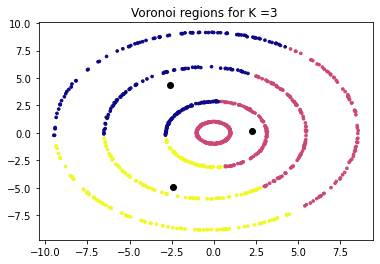

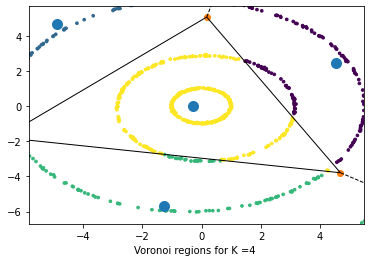

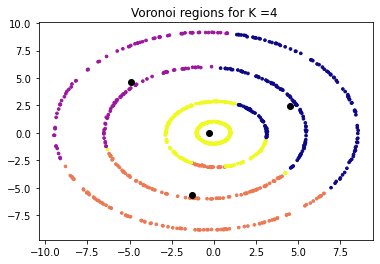

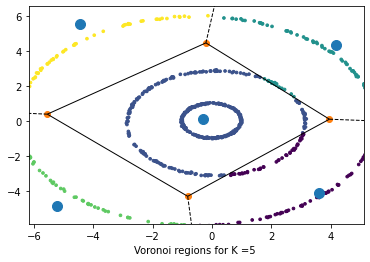

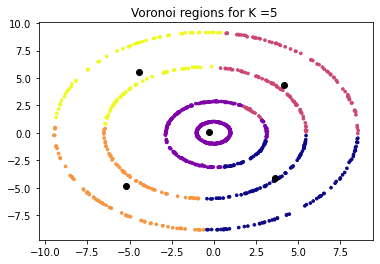

In [255]:
from scipy.spatial import Voronoi, voronoi_plot_2d

#Copy above code, change K values
def calcZmat(npInputData , means):
    zMat = []
    for x in npInputData:
        dist = []
        for y in means:
            dis = np.sqrt(np.sum((x - y)**2)) #Req as 2D points
            dist.append(dis) #Calculate dist to each mean in set for a point
        zMat.append(np.argmin(np.array(dist)))
    return zMat
            
def kmeans(k):
    npInputData=np.array(inputData).astype(float) 
    
    #Initialize Random mean values
    randomIndex = random.sample(range(0, len(npInputData)), k) #4 bcz K=4 here
    randomMean = [npInputData[i] for i in randomIndex]

    means = randomMean #Centroid points as of now

    for i in range (50): #wrt algo,enough to stop when data settles-here 50 for graph sake 
        
        zMat = calcZmat(npInputData,means)                
        #Update Centroids
        clusters = [[] for i in range(k)] #4 as K=4,clusters 
        newMeans = []
        for i in range(len(npInputData)):
            clusters[zMat[i]].append(npInputData[i]) #Add data point to respective cluster
        for i in range(len(clusters)):
            newMeans.append(np.average(clusters[i], axis=0))
        
        means = newMeans
        
        
    

    #plt.scatter(npInputData[:, 0], npInputData[:, 1], c=zMat, s=7)
    #plt.xlabel('Voronoi regions for K ={} ' .format(k))
    #plt.show()
        
    #With using Scipy
    vPlt = Voronoi(means)
    voronoi_plot_2d(vPlt, point_size=20)
    plt.scatter(npInputData[:, 0], npInputData[:, 1], c=zMat, s=7)
    plt.xlabel('Voronoi regions for K ={} ' .format(k))
    plt.show()
    
    #Without scipy, plot
    plt.scatter(npInputData[:, 0], npInputData[:, 1], c=zMat, s=7, cmap='plasma')
    plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], color='black')
    plt.title('Voronoi regions for K ={} ' .format(k))
    plt.show()
    
kVal=[3,4,5] #got some Qhull error for K=2--Check why
for i in range (len(kVal)):
    kmeans(kVal[i])
    

Q2.iii)Run the spectral clustering algorithm (spectral relaxation of K-means using KernelPCA) k = 4

#planning to use Polynomial and radial basis kernals as already defined these earlier. Poly first.

Text(0.5, 1.0, 'Spectral Clustering, kernel A, d=2 , k=4')

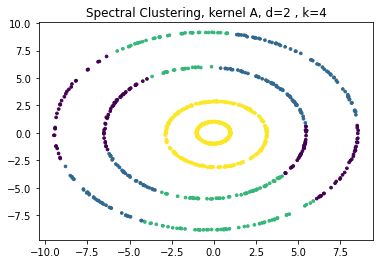

In [258]:
#Calculating hMatrix
def calcHmat(eig,kn): #kn: K=4, just to avoid name conflict
    tempMat = eig[0][1]
    for x in range(1, kn):
        tempMat = np.vstack((tempMat, eig[x][1]))
    tempMat = tempMat.T
    for x in range(tempMat.shape[0]):
        tempMat[x, :] = tempMat[x, :] / np.linalg.norm(tempMat[x, :], ord=2)
    return tempMat


#Copied earlier code to calc Kernel matrix using polynomial kernel
def kerA(ip,d):
    ip = np.transpose(ip)

    ker = []
    r,c = ip.shape
    for i in range(c):
        tempRow = []
        for j in range(c):
            kij = kA(ip[:, i], ip[:, j], d)
            tempRow.append(kij)
        ker.append(tempRow)
    npKer = np.array(ker)
            
    #Centering
    allOnes = np.ones(npKer.shape)/c
    npKer = npKer - np.matmul(allOnes, npKer) - np.matmul(npKer, allOnes) + np.matmul(allOnes, np.matmul(npKer, allOnes))
    
    #print(npKer)    
    
    #Find eigen values and eigen vectors for Kernel matrix
    eigVals , eigVecs = np.linalg.eig(npKer) #betaK and lambdaK
    eigVals = np.real_if_close(eigVals, tol=1)  #got complex value error, 
    eigVecs = np.real_if_close(eigVecs, tol=1)
    eigToSort = []
    for k in range(len(eigVals)):
        #alphak = eigVecs[:, k] / np.sqrt(eigVals[k])
        eigToSort.append((eigVals[k], eigVecs[:, k]))  #to sort wrt eigen values, first appending
    eigToSort.sort(key= lambda x: x[0], reverse=True)
    
    hMat = calcHmat (eigToSort,4) #bcz K=4 as per ques
    return hMat

#Calculate Kernel matrix using polynomial kernel, degree=2, (No of cluster=k=4)
#compute H* matrix; wkt Top K eigen vectors of Kernel matrix
npInputData=np.array(inputData).astype(float) 
hStar = kerA(npInputData,2)

#Perform Lloyds Algo (Copied earlier code)
#Initialize Random mean values
randomIndex = random.sample(range(0, len(hStar)), 4) #4 bcz K=4 here
randomMean = [hStar[i] for i in randomIndex]

means = randomMean #Centroid points as of now
errorFn = []
for i in range (1000): #wrt algo,enough to stop when data settles-here 50 for graph sake 
        
    zMat = calcZmat(hStar,means)
                
    #Update Centroids
    clusters = [[] for i in range(4)] #4 as K=4,clusters 
    newMeans = []
    for i in range(len(hStar)):
        clusters[zMat[i]].append(hStar[i]) #Add data point to respective cluster
    for i in range(len(clusters)):
        newMeans.append(np.average(clusters[i], axis=0))
        
    means = newMeans
    
plt.scatter(npInputData[:, 0], npInputData[:, 1], c=zMat, s=7)
plt.title('Spectral Clustering, kernel A, d=2 , k=4')

Text(0.5, 1.0, 'Spectral Clustering, kernel B, Sigma=1 , k=4')

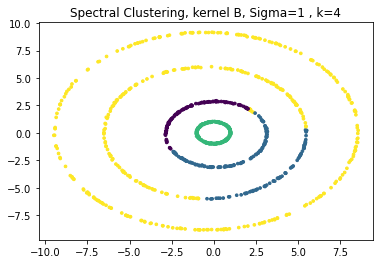

In [273]:
#Copied earlier code to calc Kernel matrix using polynomial kernel
def kerB(ip,sigma):
    ip = np.transpose(ip)

    ker = []
    r,c = ip.shape
    for i in range(c):
        tempRow = []
        for j in range(c):
            kij = kB(ip[:, i], ip[:, j], sigma)
            tempRow.append(kij)
        ker.append(tempRow)
    npKer = np.array(ker)
            
    #Centering
    #Formula for Kernel Centering
#(Phi(x) - mean(phi(X))^T(phi(x') - mean(phi(X))) in terms of K?
#You must get something that depends on the original kernel K, the row averages (column aversges) of K and the average of all entries of K.
#If your one step derivation is correct, you will end up with a symmetric kernel (obviously)
                                 
    allOnes = np.ones(npKer.shape)/c
    npKer = npKer - np.matmul(allOnes, npKer) - np.matmul(npKer, allOnes) + np.matmul(allOnes, np.matmul(npKer, allOnes))
    
    #print(ker)    
    #return ker
    
    #Find eigen values and eigen vectors for Kernel matrix
    eigVals , eigVecs = np.linalg.eig(npKer) #betaK and lambdaK
    eigVals = np.real_if_close(eigVals, tol=1)  #got complex value error, 
    eigVecs = np.real_if_close(eigVecs, tol=1)
    eigToSort = []
    for k in range(len(eigVals)):
        alphak = eigVecs[:, k] / np.sqrt(len(eigVals)*eigVals[k])
        eigToSort.append((eigVals[k], alphak))  #to sort wrt eigen values, first appending
    eigToSort.sort(key= lambda x: x[0], reverse=True)
    
    #Transform dataset
    eigReq = eigToSort[:2] #here 2 is lower dimension
    reqEigVec = np.transpose(np.array([list(eV[1]) for eV in eigReq])) #seperate out eigen vectors
    reqEigVec = np.real_if_close(reqEigVec, tol=1)
    kerTrans = np.transpose(npKer)    
    res = np.dot(kerTrans, reqEigVec) #transformed dataset
    return res

#Calculate Kernel matrix using polynomial kernel, degree=2, (No of cluster=k=4)
#compute H* matrix; wkt Top K eigen vectors of Kernel matrix
npInputData=np.array(inputData).astype(float) 
hStar = kerB(npInputData,1)

#Perform Lloyds Algo (Copied earlier code)
#Initialize Random mean values
randomIndex = random.sample(range(0, len(hStar)), 4) #4 bcz K=4 here
randomMean = [hStar[i] for i in randomIndex]

means = randomMean #Centroid points as of now
errorFn = []
for i in range (1000): #wrt algo,enough to stop when data settles-here 50 for graph sake 
        
    zMat = calcZmat(hStar,means)
                
    #Update Centroids
    clusters = [[] for i in range(4)] #4 as K=4,clusters 
    newMeans = []
    for i in range(len(hStar)):
        clusters[zMat[i]].append(hStar[i]) #Add data point to respective cluster
    for i in range(len(clusters)):
        newMeans.append(np.average(clusters[i], axis=0))
        
    means = newMeans
    
plt.scatter(npInputData[:, 0], npInputData[:, 1], c=zMat, s=7)
plt.title('Spectral Clustering, kernel B, Sigma=1 , k=4')

Q2.iv) Instead of using the method suggested by spectral clustering to map eigenvectors
to cluster assignments, use the given method

In [274]:
# #To above code, change Z matrix calculation method

# #Calculate Kernel matrix using polynomial kernel, degree=2, (No of cluster=k=4)
# #compute H* matrix; wkt Top K eigen vectors of Kernel matrix
# npInputData=np.array(inputData).astype(float) 

# #kernelA expanded
# inp = np.transpose(npInputData)

# ker1 = []
# r1,c1 = inp.shape
# for i in range(c1):
#     tempRow1 = []
#     for j in range(c1):
#         kij1 = kA(inp[:, i], inp[:, j], 2)
#         tempRow1.append(kij1)
#     ker1.append(tempRow1)
# npKer1 = np.array(ker1)
            
# #Centering
# allOnes1 = np.ones(npKer1.shape)/c1
# npKer1 = npKer1 - np.matmul(allOnes1, npKer1) - np.matmul(npKer1, allOnes1) + np.matmul(allOnes1, np.matmul(npKer1, allOnes1))
    
#     #print(npKer)    
    
# #Find eigen values and eigen vectors for Kernel matrix
# eigVals1 , eigVecs1 = np.linalg.eig(npKer1) #betaK and lambdaK
# eigVals1 = np.real_if_close(eigVals1, tol=1)  #got complex value error, 
# eigVecs1 = np.real_if_close(eigVecs1, tol=1)
# eigToSort1 = []
# for k in range(len(eigVals1)):
#         #alphak = eigVecs[:, k] / np.sqrt(eigVals[k])
#     eigToSort1.append((eigVals1[k], eigVecs1[:, k]))  #to sort wrt eigen values, first appending
# eigToSort1.sort(key= lambda x: x[0], reverse=True)

# #CalcHMat expanded
# tempMat1 = eigToSort1[0][1]
# for x in range(1, 4): #bcz K=4clusters
#     tempMat1 = np.vstack((tempMat1, eigToSort1[x][1]))
# tempMat1 = tempMat1.T
# for x in range(tempMat1.shape[0]):
#     tempMat1[x, :] = tempMat1[x, :] / np.linalg.norm(tempMat1[x, :], ord=2)
    
# hStar = tempMat1

# #Perform Lloyds Algo 
# #Initialize Random mean values
# randomIndex = random.sample(range(0, len(hStar)), 4) #4 bcz K=4 here
# randomMean = [hStar[i] for i in randomIndex]

# means = randomMean #Centroid points as of now

# #assign as per given rule
# zMat = []
# for x in hStar:
#     dist = []
#     for y in means:
#             #dis = np.sqrt(np.sum((x - y)**2)) #Req as 2D points
#             dis = np.array(eigToSort1[y,:])
#             dist.append(dis) #Calculate dist to each mean in set for a point
#     zMat.append(np.argmax(np.array(dist)))
    
# plt.scatter(npInputData[:, 0], npInputData[:, 1], c=zMat, s=7)
# plt.title('Spectral Clustering, kernel A, d=2 , k=4, as per given cluster assignment')

TypeError: list indices must be integers or slices, not tuple